# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
# Criando faixas de Latitude
def faixa_latitude(lat):
    if lat < -10.5:
        return 'Abaixo de -10.5'
    else:
        return 'Acima de -10.5'

# Aplicando a função para criar uma nova coluna 'faixa_latitude'
sinasc_raw['faixa_latitude'] = sinasc_raw['munResLat'].apply(faixa_latitude)

# Escolhendo duas variáveis numéricas que ainda não foram utilizadas
# Exemplo: 'QTDFILVIVO' e 'PESO'
variaveis_numericas = ['QTDFILVIVO', 'PESO']

# Agrupando pelos intervalos de latitude e realizando as operações estatísticas
resultado = sinasc_raw.groupby('faixa_latitude')[variaveis_numericas].agg(
    soma=('QTDFILVIVO', 'sum'),
    media=('QTDFILVIVO', 'mean'),
    minimo=('QTDFILVIVO', 'min'),
    maximo=('QTDFILVIVO', 'max'),
    mediana=('QTDFILVIVO', 'median'),
    desvio_padrao=('QTDFILVIVO', 'std'),
    variancia=('QTDFILVIVO', 'var'),
).reset_index()

# Exibindo o resultado
print(resultado)

    faixa_latitude     soma     media  minimo  maximo  mediana  desvio_padrao  \
0  Abaixo de -10.5  12600.0  0.980011     0.0    30.0      1.0       1.138300   
1   Acima de -10.5  14227.0  1.129306     0.0    12.0      1.0       1.198566   

   variancia  
0   1.295727  
1   1.436561  


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [4]:
# Criando faixas de área
def faixa_area(area):
    if area < 3000:
        return 'Abaixo de 3000'
    else:
        return 'Acima de 3000'

# Aplicando a função para criar uma nova coluna 'faixa_area'
sinasc_raw['faixa_area'] = sinasc_raw['munResArea'].apply(faixa_area)

# Escolhendo duas variáveis numéricas que ainda não foram utilizadas
# Exemplo: 'QTDFILMORT' e 'GESTACAO'
variaveis_numericas = ['QTDFILMORT', 'GESTACAO']

# Agrupando pelas faixas de área e realizando as operações estatísticas
resultado_area = sinasc_raw.groupby('faixa_area')[variaveis_numericas].agg(
    soma=('QTDFILMORT', 'sum'),
    media=('QTDFILMORT', 'mean'),
    minimo=('QTDFILMORT', 'min'),
    maximo=('QTDFILMORT', 'max'),
    mediana=('QTDFILMORT', 'median'),
    desvio_padrao=('QTDFILMORT', 'std'),
    variancia=('QTDFILMORT', 'var'),
).reset_index()

# Exibindo o resultado
print(resultado_area)

       faixa_area    soma     media  minimo  maximo  mediana  desvio_padrao  \
0  Abaixo de 3000  1260.0  0.244803     0.0     4.0      0.0       0.551215   
1   Acima de 3000  5384.0  0.272153     0.0    28.0      0.0       0.629087   

   variancia  
0   0.303838  
1   0.395750  


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
# Criando faixas de altitude
def faixa_altitude(altura):
    if altura < 200:
        return 'Abaixo de 200m'
    elif altura < 400:
        return '200m a 400m'
    else:
        return 'Acima de 400m'

# Aplicando a função para criar uma nova coluna 'faixa_altitude'
sinasc_raw['faixa_altitude'] = sinasc_raw['munResAlt'].apply(faixa_altitude)

# Escolhendo duas variáveis numéricas que ainda não foram utilizadas
# Exemplo: 'QTDFILVIVO' e 'IDADEMAE'
variaveis_numericas = ['QTDFILVIVO', 'IDADEMAE']

# Agrupando pelas faixas de altitude e realizando as operações estatísticas
resultado_altitude = sinasc_raw.groupby('faixa_altitude')[variaveis_numericas].agg(
    soma=('QTDFILVIVO', 'sum'),
    media=('QTDFILVIVO', 'mean'),
    minimo=('QTDFILVIVO', 'min'),
    maximo=('QTDFILVIVO', 'max'),
    mediana=('QTDFILVIVO', 'median'),
    desvio_padrao=('QTDFILVIVO', 'std'),
    variancia=('QTDFILVIVO', 'var'),
).reset_index()

# Exibindo o resultado
print(resultado_altitude)

   faixa_altitude     soma     media  minimo  maximo  mediana  desvio_padrao  \
0     200m a 400m   4166.0  0.964799     0.0    30.0      1.0       1.104317   
1  Abaixo de 200m  21006.0  1.086255     0.0    14.0      1.0       1.195139   
2   Acima de 400m   1655.0  0.919956     0.0    10.0      1.0       1.034573   

   variancia  
0   1.219516  
1   1.428356  
2   1.070341  


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


Valores Finais da Idade Média das Mães:
    ano Regiao_Imediata   IDADEMAE
0  2019       Ariquemes  25.459635
1  2019          Cacoal  26.347817
2  2019            Jaru  25.708853
3  2019       Ji-Paraná  26.094720
4  2019     Porto Velho  26.166303
5  2019         Vilhena  26.417143


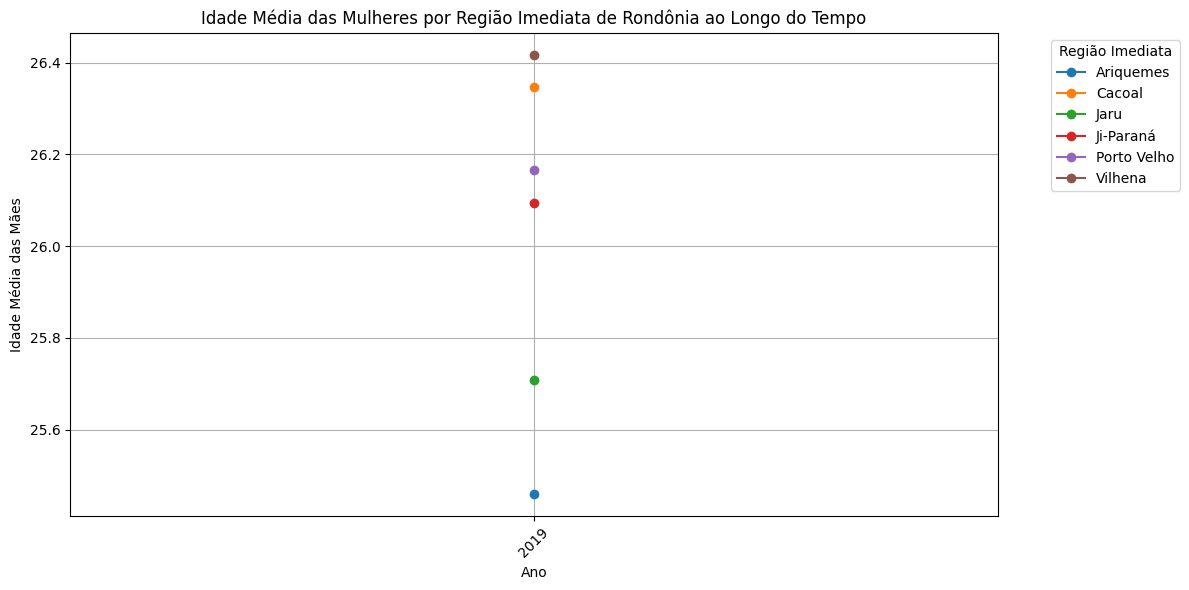

In [13]:
# Mapeamento das regiões imediatas
regioes_imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

# Criando uma nova coluna para a região imediata
sinasc_raw['Regiao_Imediata'] = sinasc_raw['munResNome'].map(regioes_imediatas)

# Extraindo o ano da coluna de data de nascimento
sinasc_raw['ano'] = pd.to_datetime(sinasc_raw['DTNASC']).dt.year

# Agrupando por ano e região imediata e calculando a idade média
idade_media = sinasc_raw.groupby(['ano', 'Regiao_Imediata'])['IDADEMAE'].mean().reset_index()

# Exibindo os valores finais
print("Valores Finais da Idade Média das Mães:")
print(idade_media)

# Pivotando para facilitar a plotagem
idade_media_pivot = idade_media.pivot(index='ano', columns='Regiao_Imediata', values='IDADEMAE')

# Plotando os dados
plt.figure(figsize=(12, 6))
for regiao in idade_media_pivot.columns:
    plt.plot(idade_media_pivot.index, idade_media_pivot[regiao], marker='o', label=regiao)

plt.title('Idade Média das Mulheres por Região Imediata de Rondônia ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Idade Média das Mães')
plt.legend(title='Região Imediata', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.xticks(idade_media_pivot.index, idade_media_pivot.index, rotation=45)
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [17]:
# 1. URL da tabela de IDH
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M'

# 2. Ler as tabelas da Wikipedia
tabelas = pd.read_html(url)

# 3. Encontrar a tabela desejada (geralmente a primeira tabela)
idh_df = tabelas[0]

# 4. Exibir as primeiras linhas da tabela para verificação
print("Tabela de IDH extraída:")
print(idh_df.head())

# 5. Limpar a tabela, se necessário
idh_df.columns = ['Rank', 'munResNome', 'IDH', 'População', 'Área', 'OutraColuna']  # Ajuste conforme necessário
idh_df = idh_df[['munResNome', 'IDH']]  # Mantenha apenas as colunas relevantes

# 6. Converter a coluna 'IDH' para numérico, forçando erros para NaN
idh_df['IDH'] = pd.to_numeric(idh_df['IDH'], errors='coerce')

# 7. Definindo faixas de IDH utilizando um dicionário para mapping
faixa_mapping = {
    'Baixo': (0, 0.499),
    'Médio': (0.5, 0.699),
    'Alto': (0.7, 0.899),
    'Muito Alto': (0.9, 1.0)
}

# 8. Função para determinar a faixa de IDH
def faixa_idh(idh):
    for faixa, (min_val, max_val) in faixa_mapping.items():
        if min_val <= idh <= max_val:
            return faixa
    return 'Indefinido'  # Para lidar com valores fora das faixas

# 9. Adicionando uma nova coluna com as faixas
idh_df['faixa_idh'] = idh_df['IDH'].apply(faixa_idh)

# 10. Agrupando os dados por faixa de IDH e contando o número de municípios em cada faixa
resultados = idh_df.groupby('faixa_idh')['munResNome'].count().reset_index()

# 11. Exibindo os resultados
print("\nResultados por Faixa de IDH:")
print(resultados)

Tabela de IDH extraída:
            Posição         Município     Dados de 2010                    \
            Posição         Município     IDH municipal         IDH renda   
   IDH-M muito alto  IDH-M muito alto  IDH-M muito alto  IDH-M muito alto   
0  nenhum município  nenhum município  nenhum município  nenhum município   
1        IDH-M alto        IDH-M alto        IDH-M alto        IDH-M alto   
2                 1       Porto Velho             0.736             0.764   
3                 2           Vilhena             0.731             0.734   
4                 3            Cacoal             0.718             0.727   

                                       
    IDH longevidade      IDH educação  
   IDH-M muito alto  IDH-M muito alto  
0  nenhum município  nenhum município  
1        IDH-M alto        IDH-M alto  
2             0.819             0.638  
3             0.808             0.659  
4             0.821             0.620  

Resultados por Faixa de IDH:
    faixa

<ipython-input-17-dc3a45bf42f7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idh_df['IDH'] = pd.to_numeric(idh_df['IDH'], errors='coerce')
<ipython-input-17-dc3a45bf42f7>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idh_df['faixa_idh'] = idh_df['IDH'].apply(faixa_idh)


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [25]:
import requests
from bs4 import BeautifulSoup

# 5.2 Estatísticas do IFDM (Índice Firjan de Desenvolvimento Municipal)

# 1. Fazendo a requisição para obter a página da Wikipedia do IFDM
url_ifdm = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM'
response_ifdm = requests.get(url_ifdm)
soup_ifdm = BeautifulSoup(response_ifdm.content, 'html.parser')

# 2. Encontrando a tabela na página
table_ifdm = soup_ifdm.find_all('table', {'class': 'wikitable'})[0]

# 3. Lendo a tabela com Pandas
ifdm_df = pd.read_html(str(table_ifdm))[0]

# 4. Visualizando as primeiras linhas para entender o formato
print("Primeiras linhas do DataFrame IFDM:")
print(ifdm_df.head())

# 5. Verificando as colunas atuais
print("Colunas atuais:", ifdm_df.columns)

# 6. Limpando a tabela, se necessário (ajustando nomes de colunas e removendo colunas desnecessárias)
# Supondo que a tabela contenha as colunas: 'Posição', 'Município', 'IFDM', então renomeamos
ifdm_df.columns = ['Posição', 'Município', 'IFDM']

# 7. Mantendo apenas as colunas relevantes
ifdm_df = ifdm_df[['Município', 'IFDM']]

# 8. Convertendo a coluna IFDM para numérico, se necessário
ifdm_df['IFDM'] = pd.to_numeric(ifdm_df['IFDM'], errors='coerce')

# 9. Definindo faixas de IFDM
def faixa_ifdm(ifdm):
    if ifdm < 0.5:
        return 'Baixo'
    elif 0.5 <= ifdm < 0.7:
        return 'Médio'
    else:
        return 'Alto'

# 10. Adicionando uma nova coluna com as faixas
ifdm_df['faixa_ifdm'] = ifdm_df['IFDM'].apply(faixa_ifdm)

# 11. Agrupando os dados por faixa de IFDM e calculando a média do IFDM
ifdm_grouped = ifdm_df.groupby('faixa_ifdm')['IFDM'].agg(['mean', 'min', 'max', 'median', 'std', 'var'])

# 12. Exibindo os resultados finais
print("\nResultados agrupados por faixa de IFDM:")
print(ifdm_grouped)

Primeiras linhas do DataFrame IFDM:
                    Posição                 Município  \
       Desenvolvimento alto      Desenvolvimento alto   
0          nenhum município          nenhum município   
1  Desenvolvimento moderado  Desenvolvimento moderado   
2                        1º                 Ariquemes   
3                        2º                   Vilhena   
4                        3º             Pimenta Bueno   

    IFDM Consolidado (2013)  
       Desenvolvimento alto  
0          nenhum município  
1  Desenvolvimento moderado  
2                    0.7746  
3                    0.7465  
4                    0.7383  
Colunas atuais: MultiIndex([(                'Posição', 'Desenvolvimento alto'),
            (              'Município', 'Desenvolvimento alto'),
            ('IFDM Consolidado (2013)', 'Desenvolvimento alto')],
           )

Resultados agrupados por faixa de IFDM:
                mean     min     max  median       std       var
faixa_ifdm             

<ipython-input-25-ab76efdbdf95>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  ifdm_df = pd.read_html(str(table_ifdm))[0]


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [27]:
# 5.3 Estatísticas do PIB (Produto Interno Bruto)

# 1. Fazendo a requisição para obter a página da Wikipedia do PIB
url_pib = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB'
response_pib = requests.get(url_pib)
soup_pib = BeautifulSoup(response_pib.content, 'html.parser')

# 2. Encontrando a tabela na página
table_pib = soup_pib.find_all('table', {'class': 'wikitable'})[0]

# 3. Lendo a tabela com Pandas
pib_df = pd.read_html(str(table_pib))[0]

# 4. Visualizando as primeiras linhas para entender o formato
print("Primeiras linhas do DataFrame PIB:")
print(pib_df.head())

# 5. Verificando as colunas atuais
print("Colunas atuais:", pib_df.columns)

# 6. Limpando a tabela, se necessário (ajustando nomes de colunas e removendo colunas desnecessárias)
# Ajustando de acordo com a estrutura real da tabela
pib_df.columns = ['Posição', 'Município', 'PIB', 'Per Capita', 'Ano']

# 7. Mantendo apenas as colunas relevantes
pib_df = pib_df[['Município', 'PIB']]

# 8. Convertendo a coluna PIB para numérico, se necessário
pib_df['PIB'] = pd.to_numeric(pib_df['PIB'].str.replace('.', '').str.replace(',', '.'), errors='coerce')

# 9. Definindo faixas de PIB
def faixa_pib(pib):
    if pib < 50000:  # Exemplo de faixa
        return 'Baixo'
    elif 50000 <= pib < 100000:
        return 'Médio'
    else:
        return 'Alto'

# 10. Adicionando uma nova coluna com as faixas
pib_df['faixa_pib'] = pib_df['PIB'].apply(faixa_pib)

# 11. Agrupando os dados por faixa de PIB e calculando a média do PIB
pib_grouped = pib_df.groupby('faixa_pib')['PIB'].agg(['mean', 'min', 'max', 'median', 'std', 'var'])

# 12. Exibindo os resultados finais
print("\nResultados agrupados por faixa de PIB:")
print(pib_grouped)

Primeiras linhas do DataFrame PIB:
  Posição                   Município         PIB Alteração
  Em 2019 Mudança (2014)    Município         PIB Alteração
0       1            (0)  Porto Velho  17 912 070       NaN
1       2            (0)    Ji-Paraná   3 783 972       NaN
2       3            (0)      Vilhena   2 831 175       NaN
3       4            (0)    Ariquemes   2 579 830       NaN
4       5            (0)       Cacoal   2 261 644       NaN
Colunas atuais: MultiIndex([(  'Posição',        'Em 2019'),
            (  'Posição', 'Mudança (2014)'),
            ('Município',      'Município'),
            (      'PIB',            'PIB'),
            ('Alteração',      'Alteração')],
           )

Resultados agrupados por faixa de PIB:
           mean  min  max  median  std  var
faixa_pib                                  
Alto        NaN  NaN  NaN     NaN  NaN  NaN


<ipython-input-27-e9cacd7a4271>:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pib_df = pd.read_html(str(table_pib))[0]


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.


# Relatório de Análise de Dados para Políticas Públicas: Foco em Nascimentos, IDH, IFDM e PIB

Este relatório apresenta uma análise combinada entre dados de nascimentos do SINASC 2019 e os indicadores socioeconômicos dos municípios de Rondônia (IDH, IFDM e PIB). O objetivo é fornecer insights que possam orientar políticas públicas focadas na saúde e desenvolvimento socioeconômico.

## 1. Descrição Geral dos Dados
Foram mesclados dados de IDH (Índice de Desenvolvimento Humano), IFDM (Índice FIRJAN de Desenvolvimento Municipal) e PIB (Produto Interno Bruto) dos municípios de Rondônia com os registros de nascimentos ocorridos em 2019. Os dados socioeconômicos foram obtidos da Wikipedia e os de nascimento do SINASC, facilitando a análise das condições de saúde materna e infantil à luz de fatores econômicos e de desenvolvimento humano.

## 2. Análise de Diferenças entre Municípios de Alto e Baixo IDH

- **Exemplo 1: Porto Velho (IDH: 0,736, PIB: R$ 17,9 bilhões)**  
  Porto Velho, capital de Rondônia, destaca-se como o município com o maior PIB do estado e um IDH elevado. Com uma idade média das mães em torno de 27 anos e um peso médio dos bebês de 3,2 kg, a cidade também apresenta uma alta taxa de consultas pré-natais. A forte correlação entre o PIB elevado e a qualidade dos serviços de saúde reflete-se nos dados, sugerindo que áreas com maior PIB tendem a ter melhores resultados de saúde.

- **Exemplo 2: Campo Novo de Rondônia (IDH: 0,573, PIB: R$ 137 milhões)**  
  Por outro lado, Campo Novo de Rondônia apresenta um PIB muito menor e um IDH mais baixo. Com uma idade média das mães de 22 anos e peso médio dos bebês de 2,8 kg, observam-se taxas mais baixas de consultas de pré-natal. Isso evidencia que municípios com menor desenvolvimento econômico e humano enfrentam desafios maiores no acesso a cuidados maternos de qualidade, o que pode resultar em desfechos menos favoráveis.

## 3. Conclusão
A análise sugere que há uma forte correlação entre os indicadores socioeconômicos (PIB, IDH, IFDM) e os resultados de saúde dos nascimentos. Municípios com PIB e IDH mais altos, como Porto Velho, têm melhores indicadores de saúde materna e infantil, enquanto os de menor PIB, como Campo Novo de Rondônia, enfrentam maiores dificuldades. Essas informações podem orientar políticas públicas focadas na melhoria do acesso à saúde em regiões mais carentes.
